<a href="https://colab.research.google.com/github/mopahlevani/Numerical-Methods/blob/main/7.%20Minimization%20Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Name: Mohammad Hadi Pahlevani

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Mimization

Create a python Function called Func_1(x) $= (x^4-61x^3+1160x^2-7100x+6.e3)*e^{(-\frac{x}{10.})}$

In [ ]:
def Func_1(x):
  return (x**4 - 61*x**3 + 1160*x**2 - 7100*x + 6e3)*np.exp(-x/10)

Define x as an array with lineary spaced values in the range [0,50)

In [ ]:
x = np.linspace(0,50,10000)

plot Func_1(x) in the range [0,50]

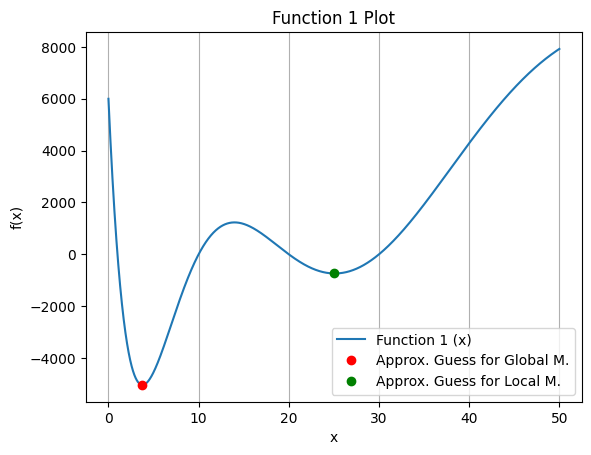

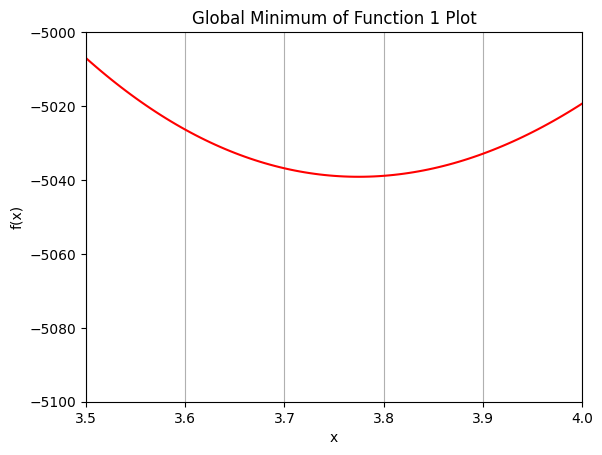

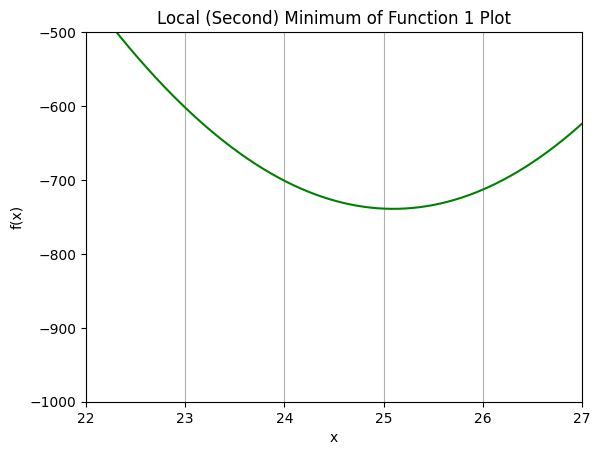

In [ ]:
plt.figure(1)
plt.plot(x,Func_1(x), label='Function 1 (x)')
plt.plot(3.75, Func_1(3.75), 'o', label='Approx. Guess for Global M.', color='red')
plt.plot(25, Func_1(25), 'o', label='Approx. Guess for Local M.', color='green')
plt.grid(axis='x', which='both')
plt.title('Function 1 Plot')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

plt.figure(2)
plt.xlim(3.5, 4)
plt.ylim(-5100, -5000)
plt.plot(x,Func_1(x), label='Function 1 (x)', color='red')
plt.grid(axis='x', which='both')
plt.title('Global Minimum of Function 1 Plot')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


plt.figure(3)
plt.xlim(22, 27)  # Set x-axis limits
plt.ylim(-1000, -500)  # Set y-axis limits
plt.plot(x,Func_1(x), label='Function 1 (x)', color='green')
plt.grid(axis='x', which='both')
plt.title('Local (Second) Minimum of Function 1 Plot')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


Now we will try to find the minimum. Graphically determines the (approximated) miminimum:
HOw many minima ?
ANSWER :
What are the approximate values ?
ANSWER:


*There are two minima over this range in this function, as shown by the plot. One is just a local minimum (Approximately at $x = 25$) and one is the global minimum (Approximately at $x=3.75$).*

Now we will try to find the minima using the 3 points bissection bracketing rule $[x_1, x_2,x_3]$, so that $F(x_2)< F(x_1)$ and $F(x_2)<F(x_3)$ so that we are sure a minimum exists between $x_1$ and $x_3$.


Write a python function, called " Minim_Func_1 ", that finds the minimum of function Func_1(x), starting from a triplet (x1,x2,x3) defined as above.

Your code must:

* take x1,x2,X3 as an arguement as well as:  $\epsilon$, the desired accuracy
* check first that $F(x_2)< F(x_1)$ and $F(x_2)<F(x_3)$
* iterate to find the minimum
* Make sure than no more than Nitermax(=1000) iterations are done.

The function must return three number :

The value of the found minimum, the accuracy, the number of steps.







1st method : The new point to consider will be the center  of the largest segment.


In [ ]:
def Minim_Func_1(x1,x2,x3, eps):
    i = 0
    Nitermax = 10000
    while i < Nitermax:
      i += 1
      a, b, c = x1, x2, x3
      fa, fb, fc = Func_1(a), Func_1(b), Func_1(c)

      # Convergence check
      if np.abs(fa - fb) < eps or np.abs(fb - fc) < eps:
          minimum = b
          if np.abs(fa - fb) < eps: accuracy = np.abs(fa - fb)
          else: accuracy = np.abs(fb - fc)
          return minimum, accuracy, i

      if fb < fa and fb < fc: # b : control point
        if fb - fa > fb - fc:
          a = (a + b) / 2     # a moves closer
        elif fb - fa < fb - fc:
          c = (c + b) /2     # c moves closer

      elif fa<fb and fa<fc:  # a : control point
        b, c = a, b          # rename
        a = (x1 + b) / 2      #

      elif fc<fb and fc<fa:
        a, b = b, c
        c = (x3 + b) /2

      x1, x2, x3 = a, b, c

    # If no convergence after max iterations
    print("Maximum iterations reached without convergence.")
    return None, None, i

In [ ]:
Min = Minim_Func_1(3,4,5, 1e-4)
print('Minimum is: ' + str(Min[0]) + ' with the accuracy of: ' + str((Min[1])) + ' in ' + str(Min[2]) + ' iterations.')

Min = Minim_Func_1(24,25,26, 1e-4)
print('Minimum is: ' + str(Min[0]) + ' with the accuracy of: ' + str((Min[1])) + ' in ' + str(Min[2]) + ' iterations.')

Minimum is: 3.75 with the accuracy of: 0.0 in 4 iterations.
Minimum is: 25.125 with the accuracy of: 0.0 in 5 iterations.


Plot the number of iterations needed to get an accuracy , abs(x3-x1) , of 0.01, 0.001, 1.e-3,1.e-4, 1.e-5,1.e-6)



Text(0, 0.5, 'Iterations')

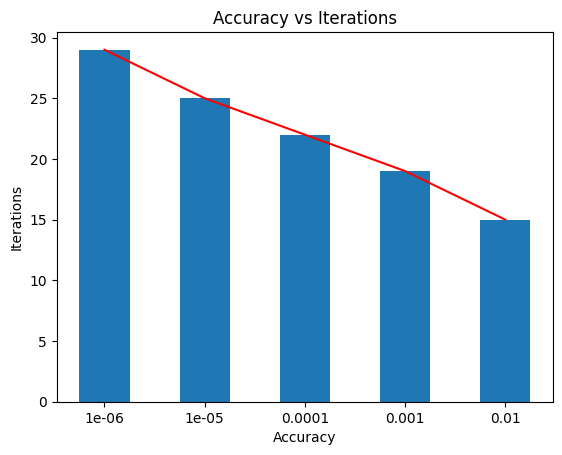

In [ ]:
accuracy_list = [0.01, 0.001, 1.e-3,1.e-4, 1.e-5,1.e-6]
accuracy_list.sort()

iterations_list = []
for i in accuracy_list:
    Min = Minim_Func_1(0,25,50, i)
    iterations_list.append(Min[2])

for j in range(len(accuracy_list)):  # Use indices explicitly
    accuracy_list[j] = str(accuracy_list[j])

#print(accuracy_list)
#print(iterations_list)

plt.bar(accuracy_list,iterations_list, width = 0.5)
plt.plot(accuracy_list,iterations_list, color = 'red')
plt.title('Accuracy vs Iterations')
plt.xlabel('Accuracy')
plt.ylabel('Iterations')

Plot the number and accuracy of the solution  as a function of the number of iterations. You can use the python matplotlib funcion : plt.semilogy

[1e-06, 1e-05, 0.0001, 0.001, 0.001, 0.01]


Text(0, 0.5, 'Iterations')

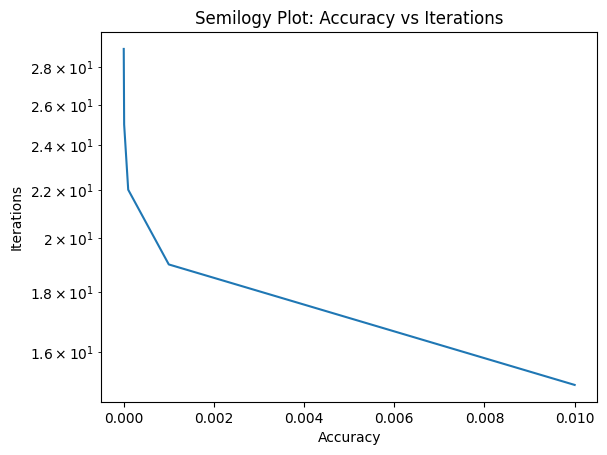

In [ ]:
for j in range(len(accuracy_list)):  # Use indices explicitly
    accuracy_list[j] = float(accuracy_list[j])
print(accuracy_list)
plt.semilogy(accuracy_list,iterations_list)
plt.title('Semilogy Plot: Accuracy vs Iterations')
plt.xlabel('Accuracy')
plt.ylabel('Iterations')



## A superlinear method.

We use [x1,x2,x3] as usual to bracket the minimum, but now point x4 will be the chose as the minimum of the parabola that passes through the 3 points [x1,x2,x3] with values [f(x1),f(x2),fx(3)]
Note :The  the minimum of the parabola that passes trhough the 3 points f(a),f(b),fx(c) is located at abscissa X such that =

$
X=b-0.5\frac{(b-a)^2(f(b)-f(c))-(b-c)^2(f(b)-f(a))}{(b-a)(f(b)-f(c))-(b-c)(f(b)-f(a))}
$

Build a minimisation function called : Minim_Parab_Func_1 that search for the minimum using parabolic descent.

Note 1: for the method to be more efficient than bissection you must make sure at each time step that the new interval has a width smaller than 0.5 of the previoux step.
So a good way to do that is to compute X4 using the formula above (X=) that is the best guess for the next minimum and take the smallest segment that brackets the minimum wihin points [x1,x2,x3,x4,0.5*(x1+x3)].



For this we can use the two following methods :
* np.sort(S), that sort in ascending order a list of values contained in a list S
* V.argmin() that returns the index of the smallest element in a array (numpy array) V.
* to transform a list in a numpy array you can use : np.array(L) where L is a list.
Example : L=[1,2,3] is a list and np.array(L) returns an array with the same elements as in L

Note 2: Make sure that your interval is ALWAYS equilibrated, I mean that x2-x1 is always comparable to x3-x2 (not necessarily equal), to avoid the *bad* situation where one of the interval is much smaller than the other one.

Note 3 : To check that your minimization process is performing well,  I suggest that at each step you print x1,x2,x3 to check that everything is occuring properly.


In [ ]:
def Minim_Parab_Func_1(x1,x2,x3, eps):
    i = 0
    Nitermax = 10000
    while i < Nitermax:
      i += 1
      if i % 1000 == 0: eps *= 1.5 # if epsilon is too small
      a, b, c = x1,x2,x3
      fa, fb, fc = Func_1(a), Func_1(b), Func_1(c)


      # Convergence check
      if np.abs(x3 - x1) < eps:
        minimum = b
        accuracy = np.abs(fb - fa)
        return minimum, accuracy, i

      elif np.abs(x3 - x1) < eps * 2:
        print(f"Stuck: Returning approximate minimum.")
        minimum = b
        accuracy = np.abs(fb - fa)
        return minimum, accuracy, i

      denom = (b-a) * (fb-fc) - (b-c) * (fb-fa)
      if np.abs(denom) < 1e-13:  # Arbitrary small threshold
        #print("Warning: Denominator too small ! changing x2.")
        x1, x2, x3 = x1, 0.5 * (x1 + x3), x3  # Reinitialize x2
        continue
      x = b - 0.5 * ((b-a)**2 * (fb-fc) - (b-c)**2 * (fb-fa))/((b-a) * (fb-fc) - (b-c)* (fb-fa))


      x4 = x
      V = [x1,x2,x3,x4,0.5*(x1+x3)]
      V = np.sort(V)
      x1,x2,x3 = V[0], V[1], V[2]
      if abs(x2 - x1) > abs(x3 - x2):
        x1 = (x2 + x1) / 2
      elif abs(x3 - x2) > abs(x2 - x1):
        x3 = (x3 + x2) / 2


      fx = Func_1(x)
      if fx < fb:
        if x < b:
          x1,x2,x3 = a, x, b
        elif x > b:
          x1,x2,x3 = b, x, c

      #x1,x2,x3 = np.sort([x1,x2,x3])
      fa, fb, fc = Func_1(x1), Func_1(x2), Func_1(x3)



    # If no convergence after max iteration
    print("Maximum iterations reached without sufficient convergence. Try different initial points or adjust eps.")
    print(f"Iteration {i}: x1={x1}, x2={x2}, x3={x3}, x4={x4}, fa={fa}, fb={fb}, fc={fc}")
    return None, None, i

Test the convergence speed of the parabolic descent rule, and display  a same graph as before. Show that the parabolic method converges much more rapidly than other method

In [ ]:
Minim_Parab_Func_1(0,5,10, 1.e-1)

(3.773405945519254, 0.15364056366433942, 7)

In [ ]:
x,eps,Np0=Minim_Parab_Func_1(0,5,10, 1.e-1)
x,eps,Np1=Minim_Parab_Func_1(0,5,10, 1.e-2)
x,eps,Np2=Minim_Parab_Func_1(0,5,10, 1.e-3)
x,eps,Np3=Minim_Parab_Func_1(0,5,10, 1.e-4)
x,eps,Np4=Minim_Parab_Func_1(0,5,10, 1.e-5)
x,eps,Np5=Minim_Parab_Func_1(0,5,10, 1.e-6)
Nplist=[Np0,Np1,Np2,Np3,Np4,Np5]
print(Nplist)

Stuck: Returning approximate minimum.
Stuck: Returning approximate minimum.
[7, 7, 14, 14, 16, 3000]


PLot the accuracy of the result, as a function of the number of iterations for the bissection and for the superlinear method.

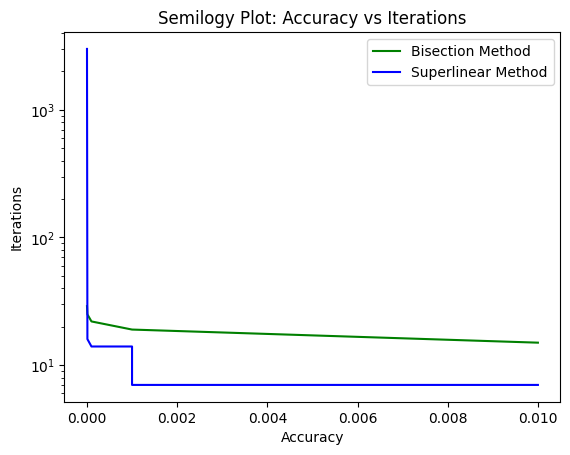

In [ ]:
Nplist = sorted(Nplist, reverse=True)
#print(Nplist)
#print(accuracy_list)
plt.semilogy(accuracy_list,iterations_list, color='green', label = 'Bisection Method')
plt.semilogy(accuracy_list, Nplist, color='blue', label='Superlinear Method')
plt.title('Semilogy Plot: Accuracy vs Iterations')
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.legend()
plt.show()

# finding the minimum of an arbitrary function : passing a function name as an argument


Now we wish our previous minimization function to be able to minimize any function, and not only the function called "Func_1". So we need to pass the function name as an argument. This is very simple in Python: we can just use an argument called (for example) $func$ and when we call the minimization function,  just pass the name of this funcion (without ' or ") in the variable func.
* Define a python function called Func_2(x) that compute any function of x (for example $f(x)=x^6-x^3$, or anything else you wish)
* Define a python function called 'call_func(f)', that will return f(2) by calling : call_func(Func_2)

Shows that it works by typing : call_func(Func_2)

In [ ]:
def Func_2(x):
  f = x**6 - x**3
  return f

def call_func(f):
  return f(2)

call_func(Func_2)

56

Finding a minimum :
    plot Func_2 within a range of values of your choice bracketing is a minimum (between 0 and 1 should be enough)

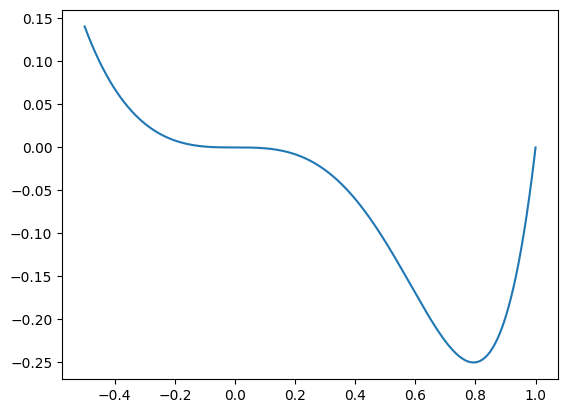

In [255]:
x = np.linspace(-0.5,1,1000)
plt.plot(x,Func_2(x))

Build a minimization function of your choice that will accept [x1,x2,x3,Func_2] as an argument and that will find the minimum of Func_2 within [x1,x3]. Try to reuse what you have already coded above

In [246]:
def Minim_Func_2(x1,x2,x3, eps, function):
    i = 0
    Nitermax = 100000
    while i < Nitermax:
      i += 1
      a, b, c = x1, x2, x3
      fa, fb, fc = function(a), function(b), function(c)

      # Convergence check
      if np.abs(fa - fb) < eps or np.abs(fb - fc) < eps:
          minimum = b
          if np.abs(fa - fb) < eps: accuracy = np.abs(fa - fb)
          else: accuracy = np.abs(fb - fc)
          return minimum, accuracy, i

      if fb < fa and fb < fc: # b : control point
        if fb - fa > fb - fc:
          a = (a + b) / 2     # a moves closer
        elif fb - fa < fb - fc:
          c = (c + b) /2     # c moves closer

      elif fa<fb and fa<fc:  # a : control point
        b, c = a, b          # rename
        a = (x1 + b) / 2      #

      elif fc<fb and fc<fa:
        a, b = b, c
        c = (x3 + b) /2

      x1, x2, x3 = a, b, c

    # If no convergence after max iterations
    print("Maximum iterations reached without convergence.")
    return None, None, i

In [319]:
def Minim_Parab_Func_2(x1,x2,x3, eps, function):
    i = 0
    Nitermax = 10000
    while i < Nitermax:
      i += 1
      if i % 1000 == 0: eps *= 1.5 # if epsilon is too small
      a, b, c = x1,x2,x3
      fa, fb, fc = function(a), function(b), function(c)


      # Convergence check
      if np.abs(x3 - x1) < eps:
        minimum = b
        accuracy = np.abs(fb - fa)
        return minimum, accuracy, i

      elif np.abs(x3 - x1) < eps * 2:
        #print(f"Stuck: Returning approximate minimum.")
        minimum = b
        accuracy = np.abs(fb - fa)
        return minimum, accuracy, i

      denom = (b-a) * (fb-fc) - (b-c) * (fb-fa)
      if np.abs(denom) < 1e-13:  # Arbitrary small threshold
        #print("Warning: Denominator too small ! changing x2.")
        x1, x2, x3 = x1, 0.5 * (x1 + x3), x3  # Reinitialize x2
        continue
      x = b - 0.5 * ((b-a)**2 * (fb-fc) - (b-c)**2 * (fb-fa))/((b-a) * (fb-fc) - (b-c)* (fb-fa))


      x4 = x
      V = [x1,x2,x3,x4,0.5*(x1+x3)]
      V = np.sort(V)
      x1,x2,x3 = V[0], V[1], V[2]
      if abs(x2 - x1) > abs(x3 - x2):
        x1 = (x2 + x1) / 2
      elif abs(x3 - x2) > abs(x2 - x1):
        x3 = (x3 + x2) / 2


      fx = function(x)
      if fx < fb:
        if x < b:
          x1,x2,x3 = a, x, b
        elif x > b:
          x1,x2,x3 = b, x, c

      #x1,x2,x3 = np.sort([x1,x2,x3])
      fa, fb, fc = function(x1), function(x2), function(x3)



    # If no convergence after max iteration
    print("Maximum iterations reached without sufficient convergence. Try different initial points or adjust eps.")
    print(f"Iteration {i}: x1={x1}, x2={x2}, x3={x3}, x4={x4}, fa={fa}, fb={fb}, fc={fc}")
    return None, None, i

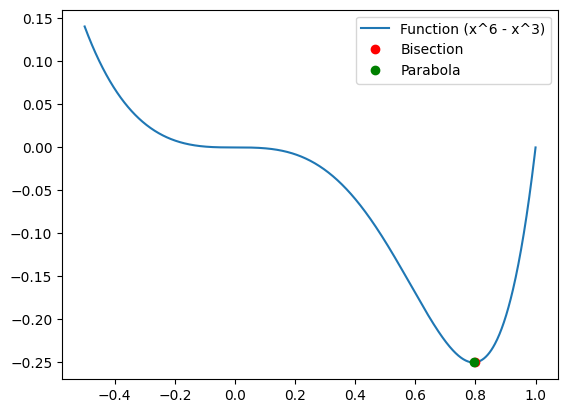

(0.8, 0.0, 3) (0.7937005228687337, 5.551115123125783e-17, 46)


In [270]:
#result1 = Minim_Func_1(3,4,5, 1e-4)
#result2 = Minim_Func_2(3,4,5, 1e-4, Func_1)
#result3 = Minim_Parab_Func_1(3,4,5, 1e-4)
#result4 = Minim_Parab_Func_2(3,4,5, 1e-4, Func_1)

def Func_2(x):
  f = x**6 - x**3
  return f
plt.plot(x,Func_2(x), label='Function (x^6 - x^3)')

result5 = Minim_Func_2(0.6,0.7,0.9, 1e-4, Func_2)
result6 = Minim_Parab_Func_2(0.3,0.5,1.1, 1e-4, Func_2)

plt.plot(result5[0], Func_2(result5[0]), 'o', label='Bisection', color='red')
plt.plot(result6[0], Func_2(result6[0]), 'o', label='Parabola', color='green')
plt.legend()
plt.show()
#print(result1, result2, result3, result4)
print(result5, result6)

# Fitting a model to data: Determining the elimination time of a medicine in the body


We try to determine how long it takes for a medecine to be eliminated from a human body (metabolisation or eliminationin urines). The medicine is injected in a subject, and measurements of the medicine concentration are done regularly during several days. The data are the following. t is the date of all measurements (in minutes, t=0 is the moment of the injection).


In [271]:
t=[0, 1.27202491e+02, 3.14663948e+02, 4.47499292e+02,
       5.77904807e+02, 7.36644162e+02, 8.77944621e+02, 1.03429168e+03,
       1.18319505e+03, 1.33041427e+03, 1.48234442e+03, 1.64547130e+03,
       1.77172013e+03, 1.92313885e+03, 2.07086937e+03, 2.22777241e+03,
       2.37867541e+03, 2.50116573e+03, 2.65833952e+03, 2.82126398e+03,
       2.95786912e+03, 3.10040140e+03, 3.25340147e+03, 3.41529223e+03,
       3.53234880e+03, 3.68589222e+03, 3.85383279e+03, 3.99062701e+03,
       4.11829287e+03, 4.26010451e+03, 4.42751803e+03, 4.57595613e+03,
       4.73240964e+03, 4.87564297e+03, 5.02498239e+03, 5.16407107e+03,
       5.31320580e+03, 5.45634412e+03, 5.61789192e+03, 5.75401807e+03]


The corresponding measured concentration are the following (in arbirary units)

In [272]:
C=[100.,  84.19752483,  79.43669653,  77.49545165,
        64.54338469,  45.67223012,  34.75582205,  36.55283011,
        41.88282264,  28.1426116 ,  21.06445026,  19.8784981 ,
        14.20655088,  13.00527066,  15.21292955,   9.48415543,
         7.86202904,   9.48789641,  12.26344071,   6.86855964,
        14.8847701 ,   0.        ,   9.94703693,   4.97773134,
         8.15232925,   4.48353225,   8.75568603,   1.12007805,
         8.0847839 ,   0.        ,   1.19374786,   0.        ,
        11.38141968,   0.        ,   5.42182953,   0.        ,
         1.69707766,  15.76470042,   3.25146039,   1.46703363]

Plot C(t) with xlabel "minutes" and ylabel "concentration"

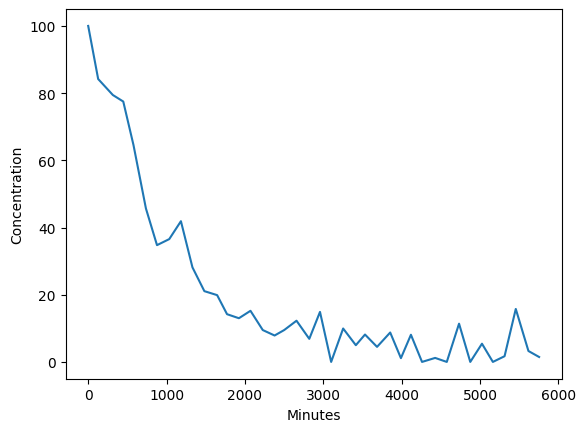

In [273]:
t = np.array(t)
C = np.array(C)
plt.plot(t,C)
plt.xlabel('Minutes')
plt.ylabel('Concentration')
plt.show()

We assume now that C(t) can be given the form $C(t,\lambda)=100e^{-t/\lambda}$. We try to determine the value of $\lambda$ that best fits the function. In order to do this we will compare different functions (will different values of $\lambda$ with the observation). We define a function called $\chi(\lambda)$ that is a measure of the distance of a model to data. $\chi(\lambda)=\sum_{i=1}^{N} (C_{obs}(t_i)-C_{model}(t_i,\lambda))^2$. The best value of $\lambda$ is the one that minimizes  $\chi(\lambda)$.

* Write a function called $XHI(\lambda)$ that returns $\chi(\lambda)$


Using the functions you have defined above, find $\lambda$

So the first thing to do is do define a function, XHI(lambda) that returns 𝜒(𝜆)

In [274]:
def Cmodel(t,lamda):
  return 100*np.exp(-t/lamda)

def XHI(lamda):
  x = 0
  for i in range(len(t)):
    x += (C[i] - Cmodel(t[i],lamda) ) **2
  return x

Now minimize XHI(lambda) with a method of your choice and find $\lambda$ . What is the value of XHI at the minimum ?

1085.0 1084.4189300638639


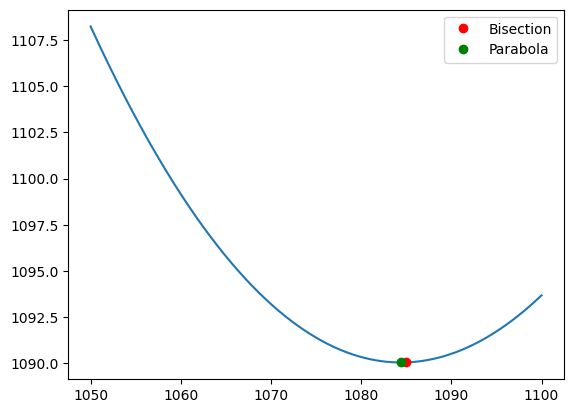

In [299]:
#lam1 = np.linspace(1e-6,3000,10000)
#plt.plot(lam1,XHI(lam1))
lam2 = np.linspace(1050,1100,10000)
plt.plot(lam2,XHI(lam2))

result00 = Minim_Func_2(1070,1080,1090, 1e-4, XHI)
result01 = Minim_Parab_Func_2(1070,1080,1090, 1e-4, XHI)

print(result00[0], result01[0])
plt.plot(result00[0], XHI(result00[0]), 'o', label='Bisection', color='red')
plt.plot(result01[0], XHI(result01[0]), 'o', label='Parabola', color='green')
plt.legend()
plt.show()
#Minim_Parab_Func_2(1360,13,x3, Func_2)

# 2 dimensional minimization

We want to minimize a function f(x,y) and we know that the minimum $(xm,ym)$ is such that $x1<xm<x2$ and $y1<ym<y2$. For example let's minimze the two variable function : $f(x,y)= ((x+y)/(y^2+1)+3xy-1)^2$. First define a function Func_3(x,y) that returns ((x+y)/(y^2+1)+3xy-1)^2.  There is a minimum betwenn -5 and +5 for x and y.


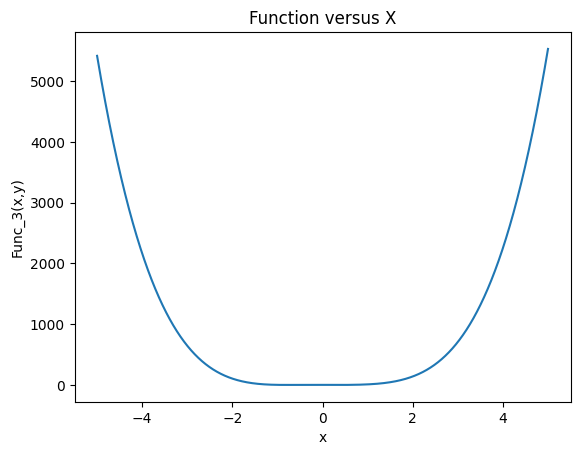

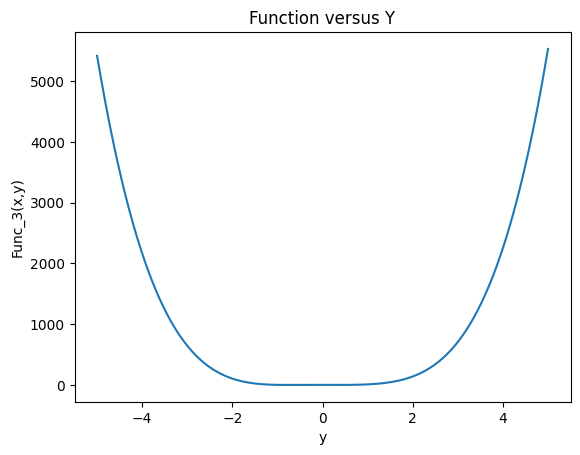

In [307]:
def Func_3(x,y):
  return ((x+y)/(y**2+1)+((3*x*y)-1))**2

x = np.linspace(-5,5,10000)
y = np.linspace(-5,5,10000)

plt.figure(1)
plt.plot(x, Func_3(x, y))
plt.xlabel('x')
plt.ylabel('Func_3(x,y)')
plt.title('Function versus X')
plt.show()

plt.figure(2)
plt.plot(y, Func_3(x, y))
plt.title('Function versus Y')
plt.xlabel('y')
plt.ylabel('Func_3(x,y)')
plt.show()

If you want to visualise it  (not mandatory) you can use this little procedure that uses triangulation (note : I use a random sampling of X and Y, so the function is not super smooth, but this is an artifact.

def plot2Dfunc(func,x1,x2,y1,y2):
    # input:
    # func : function name
    # x1,x2 : x range
    # y1,y2 : y range
    #
    
    Npoints=1000 # number of points to sample
    

   
    import matplotlib.pyplot as plt
    import numpy as np


    x=np.linspace(x1,x2,Npoints)
    y=np.linspace(y1,y2,Npoints)
    
    z=np.zeros([Npoints,Npoints])

    for i in range(Npoints):
        # Z[y,x]
        z[i,:]=func(x,y[i])
        
    
    plt.contour(x,y,z,100)
    plt.show()

    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    import numpy as np


    x=np.random.uniform(x1,x2,Npoints)
    y=np.random.uniform(y1,y2,Npoints)
    
    z=func(x,y)
    
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

To use this function, copy and paste the code above in a 'code cell" and type 'plot2Dfunc(Func,-5,5,-5,5) 'for example



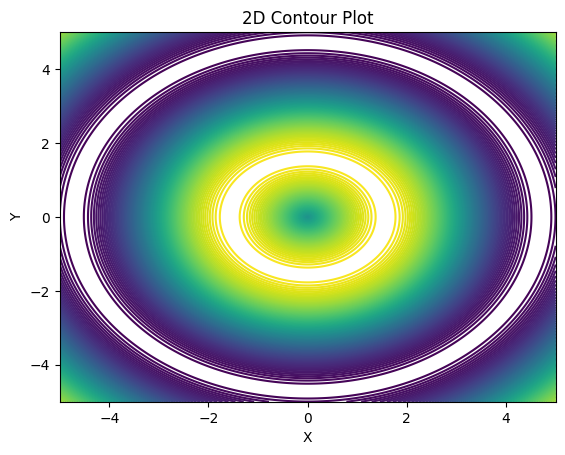

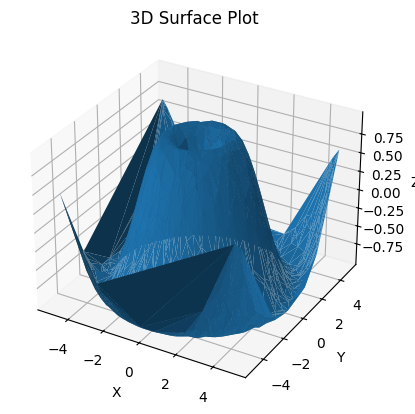

In [310]:
def plot2Dfunc(func, x1, x2, y1, y2):
    # input:
    # func : function name
    # x1,x2 : x range
    # y1,y2 : y range
    #

    Npoints = 1000  # number of points to sample

    import matplotlib.pyplot as plt
    import numpy as np

    # Generate 2D grid for contour plot
    x = np.linspace(x1, x2, Npoints)
    y = np.linspace(y1, y2, Npoints)
    z = np.zeros([Npoints, Npoints])

    for i in range(Npoints):
        # Z[y,x]
        z[i, :] = func(x, y[i])

    # Plot 2D contour
    plt.contour(x, y, z, 100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Contour Plot')
    plt.show()

    # Generate random points for 3D surface plot
    x = np.random.uniform(x1, x2, Npoints)
    y = np.random.uniform(y1, y2, Npoints)
    z = func(x, y)

    # Plot 3D surface
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')  # Use add_subplot for 3D projection
    ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('3D Surface Plot')
    plt.show()

# Example function to test
def Func_3(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

# Call the function
plot2Dfunc(Func_3, -5, 5, -5, 5)


Now code a function that find the minimum of Func_3(x,y) using the following strategy.
Knowing that x1<xm<x2 and y1<ym<y2 :
* start from a point (x0,y0) inside the interval and minimize along the x direction only (i.e. keeping y0=cst) between x1 and x2. Find a new point (x1,y0) closer to the minimum.
* now keep x1 constant and minimize along the y direction only (between y1 and y2). Find a new point (x1,y1) closer to the minimum.
* Redo the two previous steps up to a desired accuracy.
* Note : Re-use any of the functions that you have coded previously.
Find the minimum. How many steps did you do ?


In [341]:
import numpy as np

def function_minimizer(x1, x2, y1, y2, eps, function, max_iter=20000, verbose=False):
    """
    Minimize a 2D function using coordinate descent and parabolic minimization along each axis.

    Parameters:
        x1, x2: float
            Initial bounds for x.
        y1, y2: float
            Initial bounds for y.
        eps: float
            Convergence threshold.
        function: callable
            The 2D function to minimize, f(x, y).
        max_iter: int
            Maximum number of iterations (default: 20000).
        verbose: bool
            If True, print intermediate results (default: False).

    Returns:
        (x_min, y_min, iterations): tuple
            Coordinates of the minimum and the number of iterations used.
    """
    i = 0
    x0, y0 = x1, y1  # Initial guesses

    while i < max_iter:
        # Minimize along x-axis
        x0 = Minim_Parab_Func_2(x1, (x1 + x2) / 2, x2, eps, lambda x: function(x, y0))[0]
        deltax = x0 - x1
        x1 = x0  # Update x1 for next iteration

        # Minimize along y-axis
        y0 = Minim_Parab_Func_2(y1, (y1 + y2) / 2, y2, eps, lambda y: function(x0, y))[0]
        deltay = y0 - y1
        y1 = y0  # Update y1 for next iteration

        # Convergence check
        if np.sqrt(deltax**2 + deltay**2) < eps:
            #if verbose:
                #print(f"Converged after {i+1} iterations.")
            return x0, y0, i  # Return minimum

        i += 1

        #if verbose:
            #print(f"Iteration {i}: x = {x0}, y = {y0}, deltax = {deltax}, deltay = {deltay}")

    # Non-convergence case
    print("DID NOT CONVERGE! Closest result:")
    return x0, y0, i


# Define example parabolic minimization function (placeholder)
def Minim_Parab_Func_2(a, b, c, eps, func):
    # Dummy implementation using midpoint
    mid = (a + c) / 2
    return mid, func(mid)


# Example 2D function
def Func_3(x, y):
    return x**2 + y**2 + 3*x*y + 4


# Example usage
result = function_minimizer(-4, 4, -4, 4, 1e-6, Func_3, verbose=True)
print("Result:", result)


Result: (3.999999523162842, 3.999999523162842, 23)
